In [ ]:
import os
import pickle
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('./clustering_df.csv')

In [ ]:
input_directory = '../models/clustering/'

clustering_models=[]
for file_name in os.listdir(input_directory):
  file_path = os.path.join(input_directory, file_name)
  with open(file_path, 'rb') as f:
    clustering_models.append(pickle.load(f))

In [ ]:
clustering_models

[AgglomerativeClustering(metric='euclidean', n_clusters=4),
 DBSCAN(eps=0.07, min_samples=40),
 KMeans(n_clusters=7, n_init='auto')]

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
model_names = ['Agglomerative', 'DBSCAN', 'KMEANS']

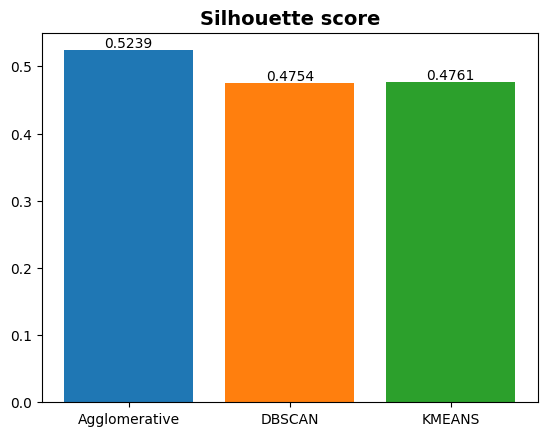

In [ ]:
for model, model_name in zip(clustering_models, model_names):
    score = silhouette_score(df, model.labels_)
    score_bar = plt.bar(model_name, score)
    height = score_bar[0].get_height()
    plt.text(score_bar[0].get_x() + score_bar[0].get_width() / 2.0, height, f'{score:.4f}', ha='center', va='bottom')
    plt.title('Silhouette score', fontdict={'fontsize': 14, 'fontweight' :'bold'})

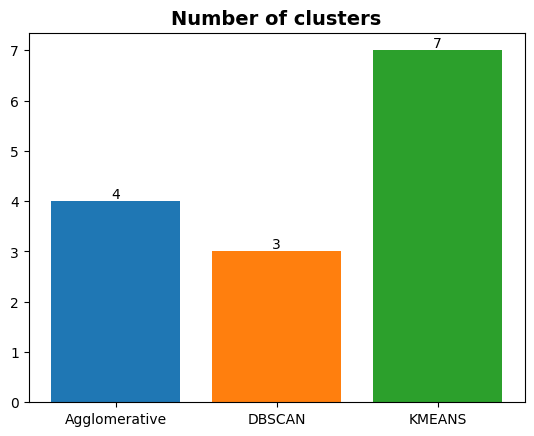

In [ ]:
for model, model_name in zip(clustering_models, model_names):
    labels = np.unique(model.labels_)
    n_clusters = labels.size
    if -1 in labels:
      n_clusters -= 1

    clusters_bar = plt.bar(model_name, n_clusters)
    height = clusters_bar[0].get_height()
    plt.text(clusters_bar[0].get_x() + clusters_bar[0].get_width() / 2.0, height, n_clusters, ha='center', va='bottom')
    plt.locator_params(axis='y', integer=True)
    plt.title('Number of clusters', fontdict={'fontsize': 14, 'fontweight' :'bold'}) 